In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygmt
from datetime import datetime, timezone

# Feature Catalogs

In [8]:
p_feats = pd.read_csv("features/p_features.csv")
s_feats = pd.read_csv("features/s_features.csv")

In [9]:
p_feats.columns

Index(['arrival_identifier', 'avg_noise_1.00', 'avg_noise_10.00',
       'avg_noise_11.00', 'avg_noise_12.00', 'avg_noise_13.00',
       'avg_noise_14.00', 'avg_noise_15.00', 'avg_noise_16.00',
       'avg_noise_17.00', 'avg_noise_18.00', 'avg_noise_2.00',
       'avg_noise_3.00', 'avg_noise_4.00', 'avg_noise_5.00', 'avg_noise_6.00',
       'avg_noise_7.00', 'avg_noise_8.00', 'avg_noise_9.00', 'avg_signal_1.00',
       'avg_signal_10.00', 'avg_signal_11.00', 'avg_signal_12.00',
       'avg_signal_13.00', 'avg_signal_14.00', 'avg_signal_15.00',
       'avg_signal_16.00', 'avg_signal_17.00', 'avg_signal_18.00',
       'avg_signal_2.00', 'avg_signal_3.00', 'avg_signal_4.00',
       'avg_signal_5.00', 'avg_signal_6.00', 'avg_signal_7.00',
       'avg_signal_8.00', 'avg_signal_9.00', 'channel', 'event_identifier',
       'location_code', 'magnitude', 'magnitude_type', 'network',
       'noise_dominant_amplitude', 'noise_dominant_frequency',
       'noise_maximum_value', 'noise_minimum_value

In [10]:
p_feats[['event_identifier', 'magnitude', 'magnitude_type']].head()

,event_identifier,magnitude,magnitude_type
0,60000622,0.83,l
1,60000622,0.83,l
2,60000622,0.83,l
3,60000622,0.83,l
4,60001352,2.06,l


In [11]:
# All events in feature catalog have mag type M_L
p_feats['magnitude_type'].unique()

array(['l'], dtype=object)

# Event Catalogs

In [15]:
# YS arrivals catalog made from Ben's catalogs - goes from 01/01/2002 to 06/30/2022 
ys_arrs = pd.read_csv('catalogs/yellowstone.arrivals.2023.csv')
ys_arrs.head()

,evid,network,station,location,channelz,phase,arrival_id,arrival_time,pick_quality,first_motion,...,receiver_lon,receiver_elev,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc
0,60000005,WY,YHB,01,HHZ,S,344,1.349112e+09,0.75,0,...,-111.19620,2167.0,44.743333,-111.0675,5.48,1.349112e+09,-0.2,d,F,2012-10-01 17:26:54.360001+00:00
1,60000005,WY,YHH,01,HHZ,P,364,1.349112e+09,0.75,0,...,-110.85050,2717.0,44.743333,-111.0675,5.48,1.349112e+09,-0.2,d,F,2012-10-01 17:26:54.360001+00:00
2,60000005,WY,YDC,01,EHZ,P,354,1.349112e+09,0.75,0,...,-111.23967,2025.0,44.743333,-111.0675,5.48,1.349112e+09,-0.2,d,F,2012-10-01 17:26:54.360001+00:00
3,60000005,WY,YMR,01,HHZ,P,349,1.349112e+09,0.75,0,...,-110.96500,2149.0,44.743333,-111.0675,5.48,1.349112e+09,-0.2,d,F,2012-10-01 17:26:54.360001+00:00
4,60000005,WY,YHB,01,EHZ,P,339,1.349112e+09,1.00,-1,...,-111.19620,2167.0,44.743333,-111.0675,5.48,1.349112e+09,-0.2,d,F,2012-10-01 17:26:54.360001+00:00


In [16]:
ys_arrs.columns

Index(['evid', 'network', 'station', 'location', 'channelz', 'phase',
       'arrival_id', 'arrival_time', 'pick_quality', 'first_motion',
       'take_off_angle', 'source_receiver_distance', 'source_receiver_azimuth',
       'travel_time_residual', 'receiver_lat', 'receiver_lon', 'receiver_elev',
       'event_lat', 'event_lon', 'event_depth', 'origin_time', 'magnitude',
       'magnitude_type', 'rflag', 'utc'],
      dtype='object')

In [18]:
# Event catalog made from arrivals catalog - goes from 01/01/2002 to 06/30/2022
ys_arrs_evs = ys_arrs.drop_duplicates('evid')
ys_arrs_evs = ys_arrs_evs.rename(columns={"evid":"event_identifier"})
ys_arrs_evs = ys_arrs_evs[['event_identifier','event_lat', 'event_lon', 'event_depth', 'origin_time', 'magnitude',
       'magnitude_type', 'rflag', 'utc']]
ys_arrs_evs.head()

,event_identifier,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc
0,60000005,44.743333,-111.067500,5.48,1.349112e+09,-0.20,d,F,2012-10-01 17:26:54.360001+00:00
5,60000010,44.438167,-111.032000,6.05,1.349101e+09,0.35,d,F,2012-10-01 14:24:40.459999+00:00
11,60000050,44.276000,-110.645667,2.18,1.350621e+09,1.15,d,F,2012-10-19 04:29:58.239998+00:00
20,60000060,44.346167,-110.327333,9.44,1.350808e+09,1.34,d,F,2012-10-21 08:32:33.660000+00:00
29,60000065,44.395000,-111.021833,4.71,1.350274e+09,0.82,d,F,2012-10-15 04:14:30.209999+00:00


In [19]:
ys_arrs_evs.tail()

,event_identifier,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc
234808,60528887,44.143833,-110.636333,10.18,1.672399e+09,1.24,d,F,2022-12-30 11:22:34.680000+00:00
234817,60528892,44.141833,-110.629167,10.34,1.672399e+09,2.21,l,F,2022-12-30 11:23:14.070000+00:00
234835,60528897,44.784167,-111.044333,6.59,1.672418e+09,0.97,l,F,2022-12-30 16:36:52.549999+00:00
234845,60528962,44.804167,-110.813000,7.57,1.672556e+09,0.47,d,F,2023-01-01 06:50:26.900000+00:00
234856,60528982,44.811000,-110.957167,8.52,1.672658e+09,1.21,l,F,2023-01-02 11:18:40.930000+00:00


## The feature magnitudes are from the UUSS catalog

In [20]:
mag_comp_df = p_feats.drop_duplicates('event_identifier')[['event_identifier', 'magnitude', 'magnitude_type']].merge(ys_arrs_evs[['event_identifier', 'magnitude', 'magnitude_type']], how='left', on='event_identifier')

In [21]:
mag_comp_df

,event_identifier,magnitude_x,magnitude_type_x,magnitude_y,magnitude_type_y
0,60000622,0.83,l,0.83,l
1,60001352,2.06,l,2.06,l
2,60001357,1.97,l,1.97,l
3,60001367,2.03,l,2.03,l
4,60001372,2.52,l,2.52,l
...,...,...,...,...,...
6410,60456897,1.93,l,1.93,l
6411,60456907,3.03,l,3.03,l
6412,60461512,1.40,l,1.40,l
6413,60467157,1.37,l,1.37,l


In [22]:
(mag_comp_df['magnitude_x'] - mag_comp_df['magnitude_y']).unique()

array([0.])

In [23]:
np.array_equal(mag_comp_df['magnitude_x'], mag_comp_df['magnitude_y'])

True

# Get feature catalog dates

In [24]:
ys_arrs_evs[ys_arrs_evs['event_identifier'].isin(p_feats['event_identifier'].iloc[[0, -1]].values)][['utc', 'origin_time']].values

array([['2012-10-07 00:32:04.740000+00:00', 1349569924.7399998],
       ['2021-12-31 20:05:50.239998+00:00', 1640981150.239998]],
      dtype=object)

In [25]:
# How to convert epoch time to utc with datetime
datetime.fromtimestamp(1349569924.74, tz=timezone.utc)

datetime.datetime(2012, 10, 7, 0, 32, 4, 740000, tzinfo=datetime.timezone.utc)

In [26]:
# How to convert utc time to epoch time
datetime(2012, 10, 7, 0, 32, 4, 740000, tzinfo=timezone.utc).timestamp()

1349569924.74

# Look at catalog info for part of 2022

In [27]:
unix2022 = datetime(2022, 1, 1, tzinfo=timezone.utc).timestamp()

In [28]:
# There are 787 YS events between 2022/01/01 and 2022/07/01 but only 182 with an M_L. Can still get new M_L for those events though
print(len(ys_arrs_evs[(ys_arrs_evs['origin_time'] > unix2022)]))
print(len(ys_arrs_evs[(ys_arrs_evs['origin_time'] > unix2022) & (ys_arrs_evs['magnitude_type'] == "l")]))

2371
863


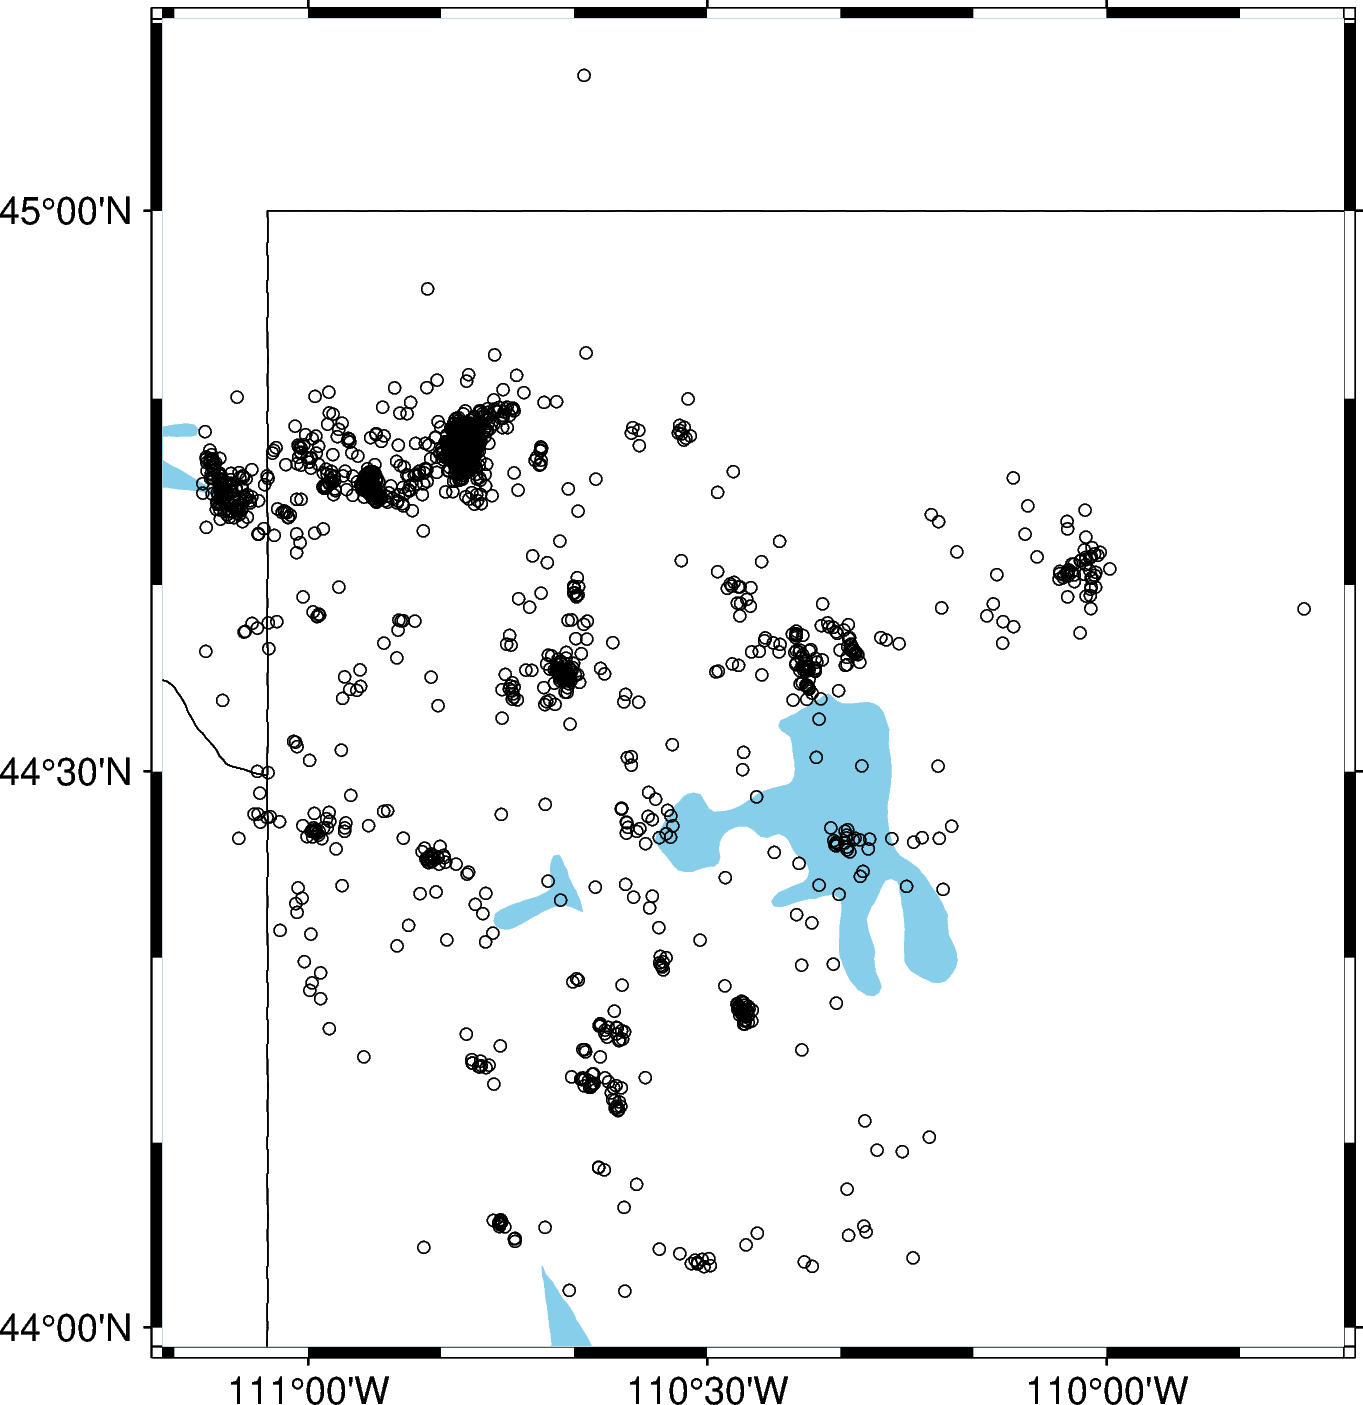

In [29]:
#Draw event map 
region = [
ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].event_lon.min() - 0.05,
ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].event_lon.max() + 0.05,
ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].event_lat.min() - 0.05,
ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].event_lat.max() + 0.05,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection="M10c", frame=True)
fig.coast(land="white", borders=2, water="skyblue")
fig.plot(data=ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022][['event_lon', 'event_lat']], style="c0.1c")
fig.show()

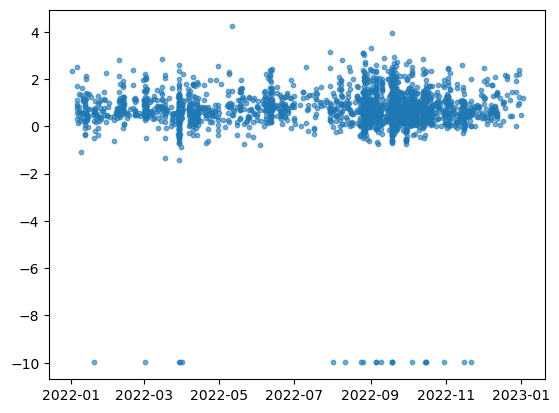

In [30]:
times = ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].apply(lambda x: datetime.fromtimestamp(x['origin_time'], tz=timezone.utc), axis=1)
fig, ax = plt.subplots(1)
ax.scatter(times, ys_arrs_evs[ys_arrs_evs['origin_time'] >  unix2022]['magnitude'], s=10.0, alpha=0.6)
ax.xaxis_date()

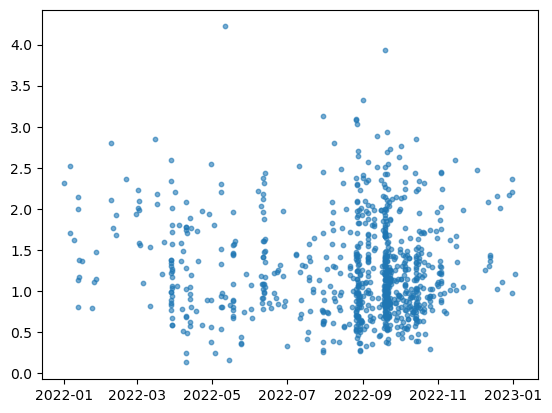

In [31]:
times = ys_arrs_evs[(ys_arrs_evs['origin_time'] > unix2022) & (ys_arrs_evs['magnitude_type'] == 'l')].apply(lambda x: datetime.fromtimestamp(x['origin_time'], tz=timezone.utc), axis=1)
fig, ax = plt.subplots(1)
ax.scatter(times, ys_arrs_evs[(ys_arrs_evs['origin_time'] > unix2022) & (ys_arrs_evs['magnitude_type'] == 'l')]['magnitude'], s=10.0, alpha=0.6)
ax.xaxis_date()

## Grizzly Lake Area

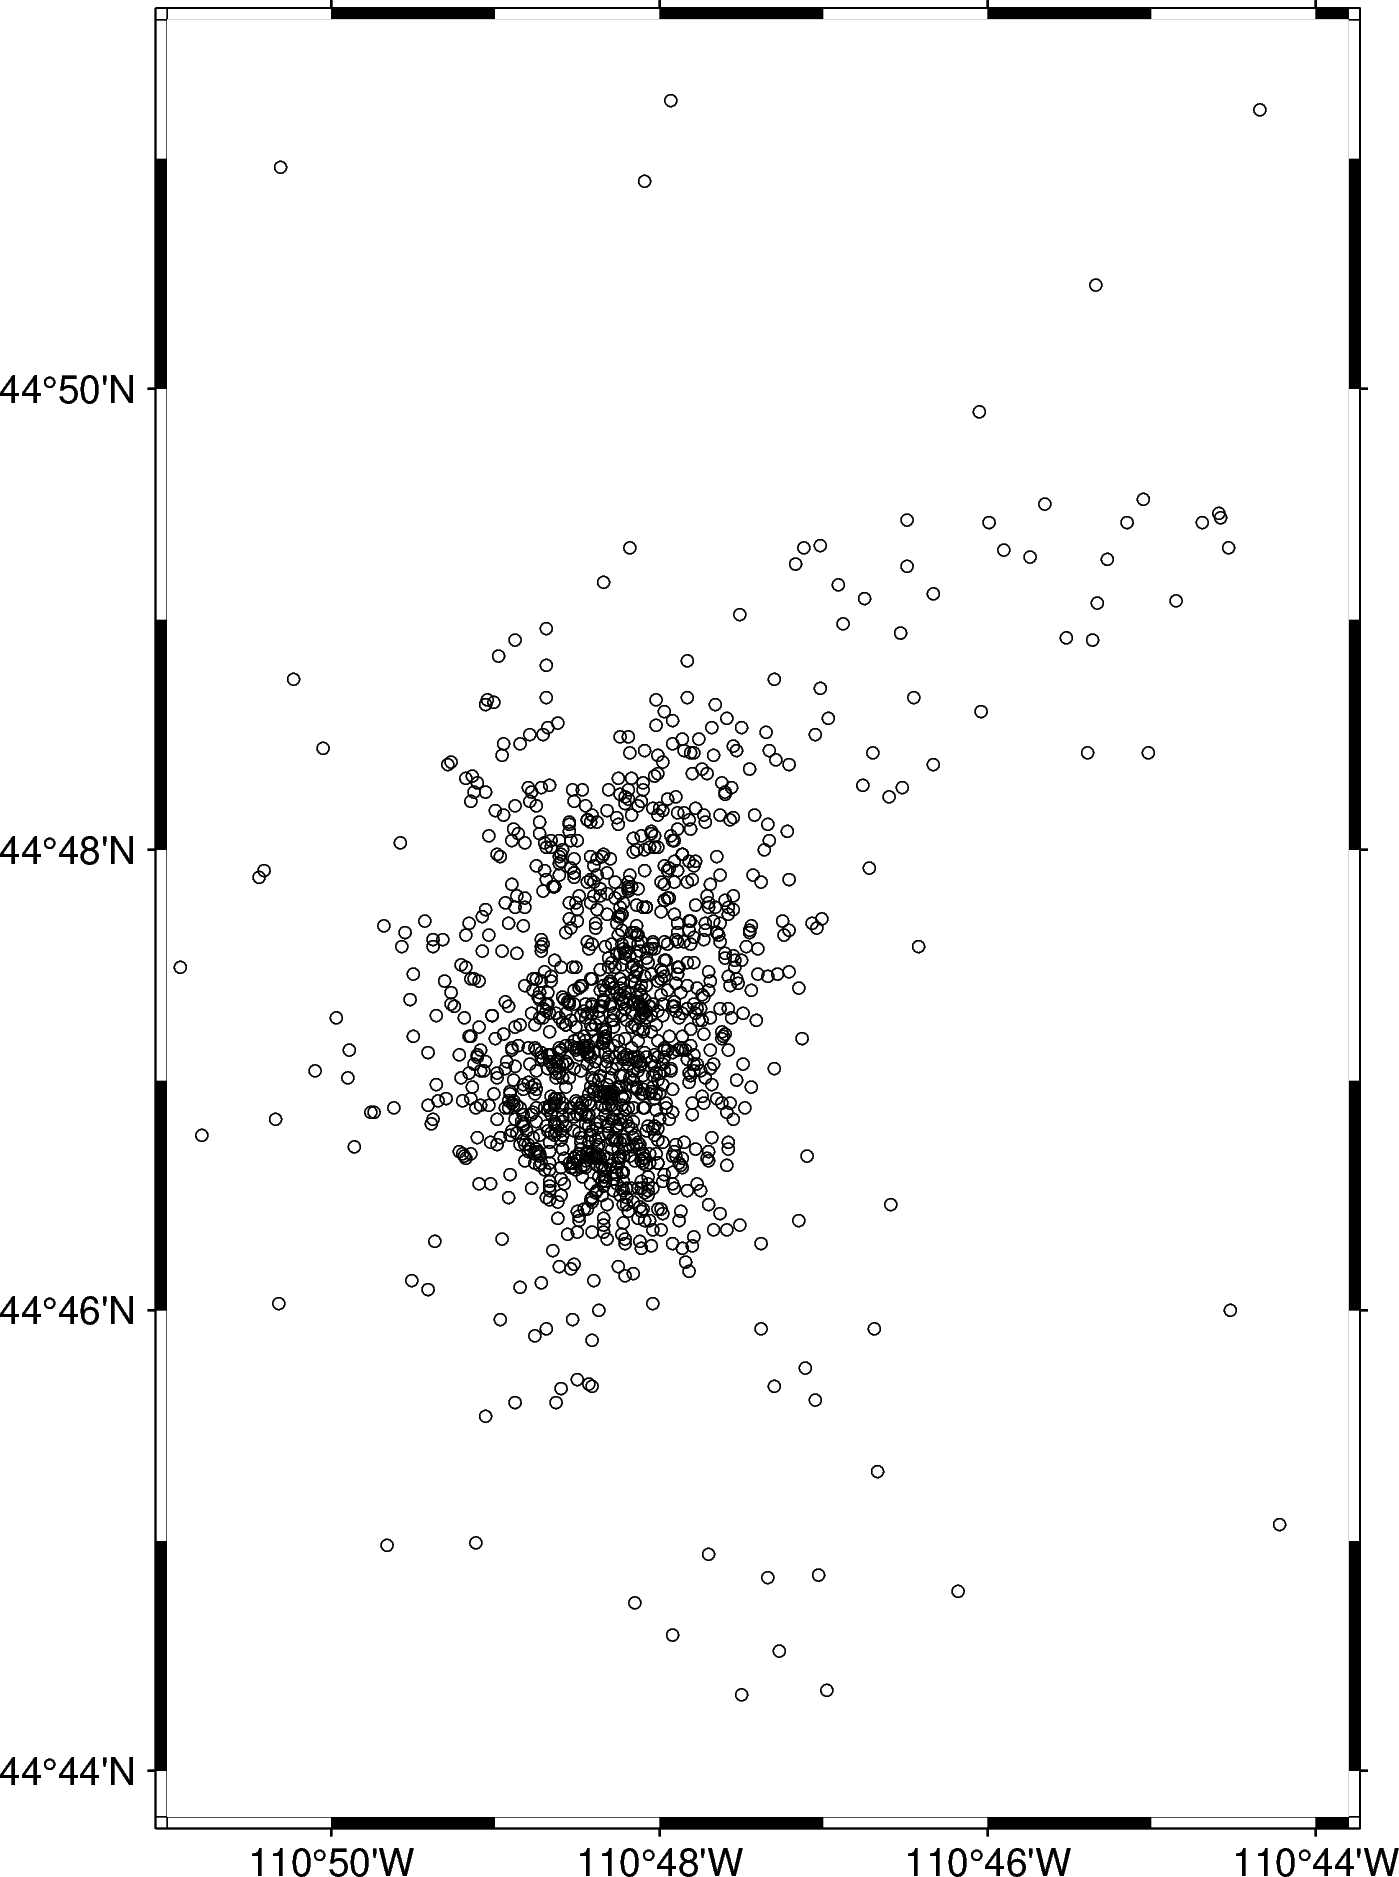

In [32]:
#Draw event map 
gl_region = [
-110.850,
-110.73,
44.73,
44.86,
]

fig = pygmt.Figure()
fig.basemap(region=gl_region, projection="M10c", frame=True)
fig.coast(land="white", borders=2, water="skyblue")
fig.plot(data=ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022][['event_lon', 'event_lat']], style="c0.1c")
fig.show()

In [33]:
gl_evs = ys_arrs_evs[(ys_arrs_evs.event_lon >= gl_region[0]) & (ys_arrs_evs.event_lon <= gl_region[1]) & 
                     (ys_arrs_evs.event_lat >= gl_region[2]) & (ys_arrs_evs.event_lat <= gl_region[3])]

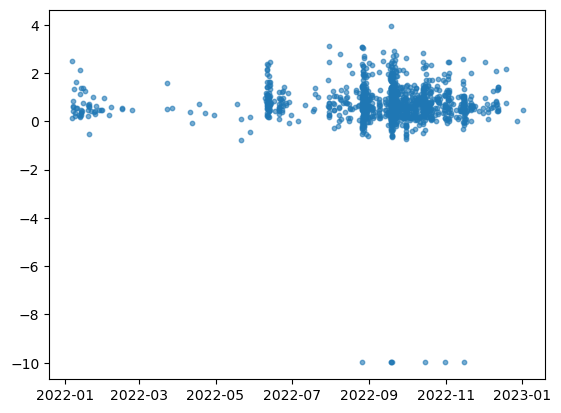

In [34]:
times = gl_evs[gl_evs['origin_time'] > unix2022].apply(lambda x: datetime.fromtimestamp(x['origin_time'], tz=timezone.utc), axis=1)
fig, ax = plt.subplots(1)
ax.scatter(times, gl_evs[gl_evs['origin_time'] > unix2022]['magnitude'], s=10.0, alpha=0.6)
ax.xaxis_date()

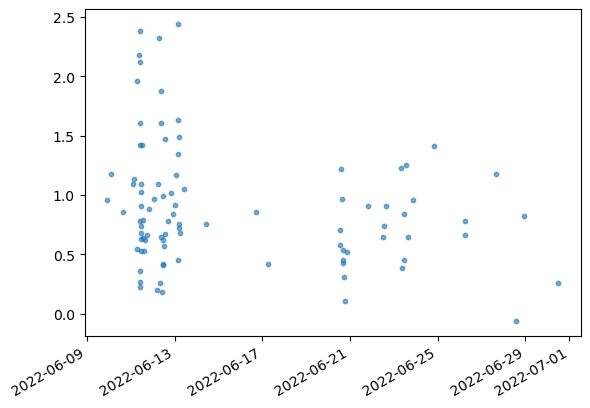

In [35]:
times = gl_evs[(gl_evs['origin_time'] >= datetime(2022, 6, 1, tzinfo=timezone.utc).timestamp()) & 
               (gl_evs['origin_time'] < datetime(2022, 7, 1, tzinfo=timezone.utc).timestamp())].apply(lambda x: datetime.fromtimestamp(x['origin_time'], tz=timezone.utc), axis=1)
fig, ax = plt.subplots(1)
ax.scatter(times, gl_evs[(gl_evs['origin_time'] >= datetime(2022, 6, 1, tzinfo=timezone.utc).timestamp()) & 
                            (gl_evs['origin_time'] < datetime(2022, 7, 1, tzinfo=timezone.utc).timestamp())]['magnitude'], s=10.0, alpha=0.6)
ax.xaxis_date()
fig.autofmt_xdate()

In [36]:
gl_evs[(gl_evs.origin_time > datetime(2022, 6, 11, tzinfo=timezone.utc).timestamp()) & (gl_evs.origin_time < datetime(2022, 6, 13, tzinfo=timezone.utc).timestamp())].shape

(46, 9)

In [37]:
p_feats[p_feats.event_identifier == 60503677]

,arrival_identifier,avg_noise_1.00,avg_noise_10.00,avg_noise_11.00,avg_noise_12.00,avg_noise_13.00,avg_noise_14.00,avg_noise_15.00,avg_noise_16.00,avg_noise_17.00,...,signal_dominant_frequency,signal_maximum_value,signal_minimum_value,signal_variance,source_depth_km,source_latitude,source_longitude,source_receiver_back_azimuth,source_receiver_distance_km,station


In [40]:
gl_evs[(gl_evs.origin_time > datetime(2022, 6, 11, tzinfo=timezone.utc).timestamp()) & (gl_evs.origin_time < datetime(2022, 6, 13, tzinfo=timezone.utc).timestamp())]['magnitude_type'].value_counts()

magnitude_type
d    27
l    19
Name: count, dtype: int64